<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Reinforcement Learning #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2022 University of Illinois Board of Trustees. All Rights Reserved.

See
* https://gym.openai.com/
* https://github.com/openai/gym/blob/master/gym/envs/classic_control/continuous_mountain_car.py

# Setup

## imports and graphics configurations

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from matplotlib.backends.backend_agg import FigureCanvasAgg
import itertools

def saver(fname,dpi=600):
    plt.savefig(fname+".png",bbox_inches="tight",dpi=dpi)

def legend(pos="bottom",ncol=3,below_offset=-0.2):
    if pos=="bottom":
        plt.legend(bbox_to_anchor=(0.5,below_offset), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
    #"text.usetex":True,
    #"text.latex.preamble":r'\usepackage{{amsmath}}'
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
print([os.remove(f) for f in pngfiles])

existing png files: ['gravity.png', 'landscape.png', 'strategy_1_summary.png', 'tangential.png']
[None, None, None, None]


In [ ]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
import imageio
import PIL
import gym
import pyglet
from PIL import Image

##  configuration variables

In [ ]:
SEED=0
fps=15

# main

In [ ]:
m=0.7
def U(x):
    return m*x+0.2*x**2

xlim=2

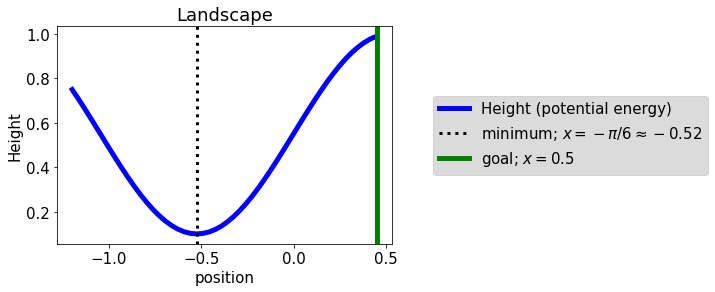

In [ ]:
(position_min,position_max)=(-1.2,0.45)
position_range=numpy.linspace(position_min,position_max)

def force(position):
    return -numpy.cos(3*position)


def height(position):
    return 0.45*numpy.sin(3*position)+.55


critical=-numpy.pi/6

plt.figure()
c="blue"
plt.plot(position_range,height(position_range),color=c,label="Height (potential energy)")
plt.axvline(critical,color="black",linewidth=3,ls="dotted",label=r"minimum; $x=-\pi/6\approx{0:.2f}$".format(critical))
plt.axvline(position_max,color="green",label="goal; $x={0:.1f}$".format(position_max))
plt.ylabel("Height")
plt.xlabel("position")
title=[]
title.append("Landscape")
plt.title("\n".join(title))
legend("side")
saver("landscape")
plt.show()
plt.close()

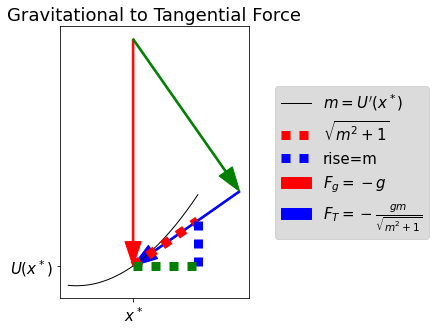

In [ ]:
g=7
px,py=(g*m/(m**2+1),g*m**2/(m**2+1))
xrange=numpy.linspace(-xlim,xlim)
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal')
plt.plot(xrange,U(xrange),color="black",label=r"$m=U'(x^*)$",linewidth=1)

mylinestyle=(0,(1,1))
mylinewidth=9
plt.plot([0,xlim],[0,m*xlim],color="red",linestyle=mylinestyle,linewidth=mylinewidth,label=r"$\sqrt{m^2+1}$")
plt.plot([xlim,xlim],[0,m*xlim],color="blue",linestyle=mylinestyle,linewidth=mylinewidth,label=r"rise=m")
plt.plot([0,xlim],[0,0],color="green",linestyle=mylinestyle,linewidth=mylinewidth,)

mylinestyle="solid"
mylinewidth=.05
myheadwidth=0.5
plt.arrow(0,g,0,-g,color="red",length_includes_head=True,width=mylinewidth,label=r"$F_g=-g$",head_width=myheadwidth)
plt.arrow(px,py,-px,-py,color="blue",length_includes_head=True,width=mylinewidth,label=r"$F_T=-\frac{gm}{\sqrt{m^2+1}}$",
          head_width=myheadwidth)
plt.arrow(0,g,px,-g+py,color="green",length_includes_head=True,width=mylinewidth,head_width=myheadwidth)

plt.xticks([0],[r"$x^*$"])
plt.yticks([0],[r"$U(x^*)$"])
legend("side")
title=[]
title.append("Gravitational to Tangential Force")
plt.title("\n".join(title))
saver("gravity")
plt.show()
plt.close()

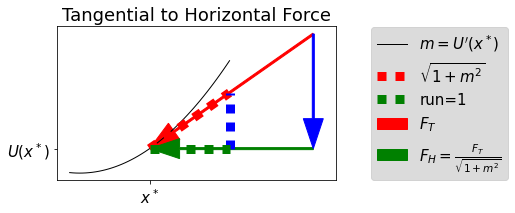

In [ ]:
Force=5
px,py=(Force/numpy.sqrt(m**2+1),Force*m/numpy.sqrt(m**2+1))
xrange=numpy.linspace(-xlim,xlim)
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal')
plt.plot(xrange,U(xrange),color="black",label=r"$m=U'(x^*)$",linewidth=1)

mylinestyle=(0,(1,1))
mylinewidth=9
plt.plot([0,xlim],[0,m*xlim],color="red",linestyle=mylinestyle,linewidth=mylinewidth,label=r"$\sqrt{1+m^2}$")
plt.plot([xlim,xlim],[0,m*xlim],color="blue",linestyle=mylinestyle,linewidth=mylinewidth)
plt.plot([0,xlim],[0,0],color="green",linestyle=mylinestyle,linewidth=mylinewidth,label=r"run=1")

mylinestyle="solid"
mylinewidth=.05
myheadwidth=0.5
plt.arrow(px,py,-px,-py,color="red",length_includes_head=True,width=mylinewidth,label=r"$F_T$",head_width=myheadwidth)
plt.arrow(px,0,-px,0,color="green",length_includes_head=True,width=mylinewidth,label=r"$F_H=\frac{F_T}{\sqrt{1+m^2}}$",head_width=myheadwidth)
plt.arrow(px,py,0,-py,color="blue",length_includes_head=True,width=mylinewidth,head_width=myheadwidth)

plt.xticks([0],[r"$x^*$"])
plt.yticks([0],[r"$U(x^*)$"])
legend("side")
title=[]
title.append("Tangential to Horizontal Force")
plt.title("\n".join(title))
saver("tangential")
plt.show()
plt.close()

In [ ]:
env = gym.make('MountainCarContinuous-v0')

In [ ]:
env.reset()
states=[]
screens=[]
action=0
N_max=100
for ctr in range(100):
    screen=env.render(mode='rgb_array')
    screens.append(screen)
    #print("action.acceleration=",action.item())
    observation, reward, done, info = env.step([action])
    states.append(observation)
    (position,velocity)=observation
    #print("observation.position={0:}, observation.velocity={1:}, reward={2:}, done={3:}".format(position,velocity,reward,done))
    #print("-----")
env.close()
print("run length: {0:n}".format(len(states)))

C:\Users\richa\anaconda3\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


run length: 100


In [ ]:
indices=numpy.pad(range(len(screens)), (1*fps,2*fps), mode='edge')

with imageio.get_writer("circular.mp4", mode='I',fps=fps) as writer:
    for n in indices:
        print(n,end=" ")
        writer.append_data(screens[n])

print("done")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 done


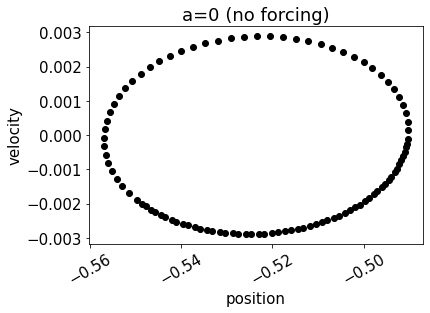

In [ ]:
(positions,velocities)=zip(*states)
plt.figure()
plt.scatter(positions,velocities,color="k")
plt.xlabel("position")
plt.ylabel("velocity")
plt.xticks(rotation=30)
plt.title("State of Mountain Cart")
plt.title("a=0 (no forcing)")
#saver("tickerA")
plt.show()
plt.close()

In [ ]:
def mountainplot(n,screen,strategystring=None,force=None,save_fname=None,show=True,return_array=False):
    fig=plt.figure(dpi=200)
    canvas = FigureCanvasAgg(fig)
    _,screenwidth,_=screen.shape
    halfwidth=int(screenwidth/2)
    plt.imshow(screen)
    if force==1:
        plt.arrow(halfwidth,50,100,0,color="red",zorder=5,linewidth=7,head_width=10)
        plt.text(halfwidth,70,"force",ha="center",va="top",zorder=6)
    elif force==-1:
        plt.arrow(halfwidth,50,-100,0,color="blue",zorder=5,linewidth=7,head_width=10)
        plt.text(halfwidth,70,"force",ha="center",va="top",zorder=6)
    plt.xticks([],[])
    plt.yticks([],[])
    title=[]
    title.append("Position of Mountain Cart")
    if strategystring is not None:
        title.append(strategystring)
    title.append("T={0:n}".format(numpy.round(n,decimals=-1)))
    plt.title("\n".join(title))
    out=None
    if save_fname is not None:
        saver(save_fname)#fname_fmt.format(ctr)
    if show:
        plt.show()
    if return_array:
        plt.tight_layout(pad=2)
        canvas.draw()       # draw the canvas, cache the renderer
        s, (width, height) = canvas.print_to_buffer()
        out=numpy.frombuffer(s, numpy.uint8).reshape((height, width, 4))
    plt.close()
    return out

In [ ]:
def mmountainplot(n,screen,strategystring=None,force=None,save_fname=None,show=True,return_array=False):
    fig=plt.figure(dpi=200)
    canvas = FigureCanvasAgg(fig)
    _,screenwidth,_=screen.shape
    halfwidth=int(screenwidth/2)
    plt.imshow(screen)
    if force==1:
        plt.arrow(halfwidth,50,100,0,color="red",zorder=5,linewidth=7,head_width=10)
        plt.text(halfwidth,70,"force",ha="center",va="top",zorder=6)
    elif force==-1:
        plt.arrow(halfwidth,50,-100,0,color="blue",zorder=5,linewidth=7,head_width=10)
        plt.text(halfwidth,70,"force",ha="center",va="top",zorder=6)
    plt.xticks([],[])
    plt.yticks([],[])
    title=[]
    title.append("Position of Mountain Cart")
    if strategystring is not None:
        title.append(strategystring)
    title.append("T={0:n}".format(numpy.round(n,decimals=-1)))
    plt.title("\n".join(title))
    out=None
    if save_fname is not None:
        saver(save_fname)#fname_fmt.format(ctr)
    if show:
        plt.show()
    if return_array:
        plt.tight_layout(pad=2)
        canvas.draw()       # draw the canvas, cache the renderer
        s, (width, height) = canvas.print_to_buffer()
        out=numpy.frombuffer(s, numpy.uint8).reshape((height, width, 4))
    plt.close()
    return out

## strategy 1:  Force=1 when velocity is positive and to the left of critical point

In [ ]:
def strategy_1(observation):
    position,velocity=observation
    if (velocity>0) and (position<critical):
        return 1
    else:
        return 0

In [ ]:
strategy=strategy_1
numpy.random.seed(SEED)
env.reset()
states=[]
rewards=[]
actions=[]
screens=[]
action=0
strategystring="Force=1 to the left of valley\n and when velocity is positive"
for ctr in range(1000):
    print(ctr,end=" ")
    screen=env.render(mode='rgb_array')
    observation, reward, done, info = env.step([action])
    states.append(observation)
    rewards.append(reward)
    actions.append(action)
    (position,velocity)=observation
    action=strategy(observation)
    screens.append(mountainplot(ctr,screen,strategystring,action,show=False,return_array=True))
    if position>=env.goal_position:
        break
    #print("observation.position={0:}, observation.velocity={1:}, reward={2:}, done={3:}".format(position,velocity,reward,done))
    #print("-----")
env.close()
print("run length: {0:n}".format(len(states)))
(positions,velocities)=zip(*states)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

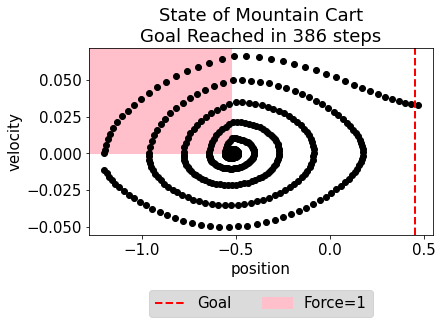

In [ ]:
(XA,XB,YA,YB)=[None]*4

def phaseplot_1(n=None,save_fname=None,show=True,return_array=False,dpi=None):
    global XA, XB, YA, YB
    if n is None:
        n=len(positions)
    n=min(n,len(positions))
    d={"figsize":(6.4,4.8),"tight_layout":{"pad":2.0}}
    if dpi is not None:
        d["dpi"]=dpi
    fig=plt.figure(**d)
    canvas = FigureCanvasAgg(fig)
    plt.scatter(positions[:n],velocities[:n],color="k")
    plt.axvline(env.goal_position,label="Goal",linewidth=2,linestyle="dashed",color="red")
    if (YA is None) or (YB is None):
        (YA,YB)=plt.ylim()
    if (XA is None) or (XB is None):
        (XA,XB)=plt.xlim()
    plt.fill_between(x=[XA,critical],y1=0,y2=YB,label="Force=1",zorder=-5,color="pink")

    plt.xlim(XA,XB)
    plt.ylim(YA,YB)
    plt.xlabel("position")
    plt.ylabel("velocity")
    title=["State of Mountain Cart"]
    title.append("Goal Reached in {0:n} steps".format(len(positions)))
    plt.title("\n".join(title))
    legend("bottom",below_offset=-0.25)
    out=None
    if save_fname is not None:
        saver(save_fname)#fname_fmt.format(ctr)
    if show:
        plt.show()
    if return_array:
        canvas.draw()       # draw the canvas, cache the renderer
        s, (width, height) = canvas.print_to_buffer()
        out=numpy.frombuffer(s, numpy.uint8).reshape((height, width, 4))
    plt.close()
    return out

phaseplot_1(save_fname="strategy_1_summary")

In [ ]:
indices=numpy.pad(range(len(screens)), (1*fps,2*fps), mode='edge')

with imageio.get_writer("mountain_1.mp4", mode='I',fps=fps) as writer:
    for n in indices:
        print(n,end=" ")
        writer.append_data(screens[n])

print("done")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 

In [ ]:
indices=numpy.pad(range(len(positions)), (1*fps,2*fps), mode='edge')

with imageio.get_writer("phase_1.mp4", mode='I',fps=fps) as writer:
    for n in indices:
        print(n,end=" ")
        plot_array=phaseplot_1(n,show=False,return_array=True,dpi=300)
        writer.append_data(plot_array.astype(numpy.uint8))

print("done")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 

## strategy 2:  Force=1 when velocity is positive

In [ ]:
def strategy_2(observation):
    position,velocity=observation
    if velocity>0:
        return 1
    else:
        return 0

In [ ]:
strategy=strategy_2
numpy.random.seed(SEED)
env.reset()
states=[]
rewards=[]
actions=[]
screens=[]
action=0
strategystring="Force=1 when velocity is positive"
for ctr in range(1000):
    print(ctr,end=" ")
    screen=env.render(mode='rgb_array')
    observation, reward, done, info = env.step([action])
    states.append(observation)
    rewards.append(reward)
    actions.append(action)
    (position,velocity)=observation
    action=strategy(observation)
    screens.append(mountainplot(ctr,screen,strategystring,action,show=False,return_array=True))
    if position>=env.goal_position:
        break
    #print("observation.position={0:}, observation.velocity={1:}, reward={2:}, done={3:}".format(position,velocity,reward,done))
    #print("-----")
env.close()
print("run length: {0:n}".format(len(states)))
(positions,velocities)=zip(*states)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 run length: 123


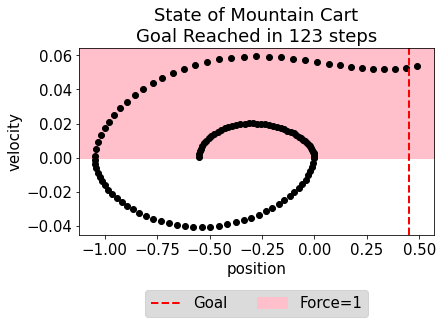

In [ ]:
(XA,XB,YA,YB)=[None]*4

def phaseplot_2(n=None,save_fname=None,show=True,return_array=False,dpi=None):
    global XA, XB, YA, YB
    if n is None:
        n=len(positions)
    n=min(n,len(positions))
    d={"figsize":(6.4,4.8),"tight_layout":{"pad":2.0}}
    if dpi is not None:
        d["dpi"]=dpi
    fig=plt.figure(**d)
    canvas = FigureCanvasAgg(fig)
    plt.scatter(positions[:n],velocities[:n],color="k")
    plt.axvline(env.goal_position,label="Goal",linewidth=2,linestyle="dashed",color="red")
    if (YA is None) or (YB is None):
        (YA,YB)=plt.ylim()
    if (XA is None) or (XB is None):
        (XA,XB)=plt.xlim()
    plt.fill_between(x=[XA,XB],y1=0,y2=YB,label="Force=1",zorder=-5,color="pink")

    plt.xlim(XA,XB)
    plt.ylim(YA,YB)
    plt.xlabel("position")
    plt.ylabel("velocity")
    title=["State of Mountain Cart"]
    title.append("Goal Reached in {0:n} steps".format(len(positions)))
    plt.title("\n".join(title))
    legend("bottom",below_offset=-0.25)
    out=None
    if save_fname is not None:
        saver(save_fname)#fname_fmt.format(ctr)
    if show:
        plt.show()
    if return_array:
        canvas.draw()       # draw the canvas, cache the renderer
        s, (width, height) = canvas.print_to_buffer()
        out=numpy.frombuffer(s, numpy.uint8).reshape((height, width, 4))
    plt.close()
    return out

phaseplot_2(save_fname="strategy_2_summary")

In [ ]:
indices=numpy.pad(range(len(screens)), (1*fps,2*fps), mode='edge')

with imageio.get_writer("mountain_2.mp4", mode='I',fps=fps) as writer:
    for n in indices:
        print(n,end=" ")
        writer.append_data(screens[n])

print("done")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 done


In [ ]:
indices=numpy.pad(range(len(positions)), (1*fps,2*fps), mode='edge')

with imageio.get_writer("phase_2.mp4", mode='I',fps=fps) as writer:
    for n in indices:
        print(n,end=" ")
        plot_array=phaseplot_2(n,show=False,return_array=True,dpi=300)
        writer.append_data(plot_array.astype(numpy.uint8))

print("done")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 122 done


## strategy 3:  Force=sign of velocity

In [ ]:
def strategy_3(observation):
    position,velocity=observation
    if velocity>0:
        return 1
    elif velocity<0:
        return -1
    else:
        return 0

In [ ]:
strategy=strategy_3
numpy.random.seed(SEED)
env.reset()
states=[]
rewards=[]
actions=[]
screens=[]
action=0
strategystring="Force=sign of velocity"
for ctr in range(1000):
    print(ctr,end=" ")
    screen=env.render(mode='rgb_array')
    observation, reward, done, info = env.step([action])
    states.append(observation)
    rewards.append(reward)
    actions.append(action)
    (position,velocity)=observation
    action=strategy(observation)
    screens.append(mountainplot(ctr,screen,strategystring,action,show=False,return_array=True))
    if position>=env.goal_position:
        break
    #print("observation.position={0:}, observation.velocity={1:}, reward={2:}, done={3:}".format(position,velocity,reward,done))
    #print("-----")
env.close()
print("run length: {0:n}".format(len(states)))
(positions,velocities)=zip(*states)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 run length: 78


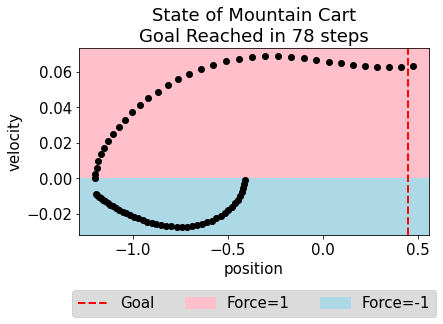

In [ ]:
(XA,XB,YA,YB)=[None]*4

def phaseplot_3(n=None,save_fname=None,show=True,return_array=False,dpi=None):
    global XA, XB, YA, YB
    if n is None:
        n=len(positions)
    n=min(n,len(positions))
    d={"figsize":(6.4,4.8),"tight_layout":{"pad":2.0}}
    if dpi is not None:
        d["dpi"]=dpi
    fig=plt.figure(**d)
    canvas = FigureCanvasAgg(fig)
    plt.scatter(positions[:n],velocities[:n],color="k")
    plt.axvline(env.goal_position,label="Goal",linewidth=2,linestyle="dashed",color="red")
    if (YA is None) or (YB is None):
        (YA,YB)=plt.ylim()
    if (XA is None) or (XB is None):
        (XA,XB)=plt.xlim()
    plt.fill_between(x=[XA,XB],y1=0,y2=YB,label="Force=1",zorder=-5,color="pink")
    plt.fill_between(x=[XA,XB],y1=YA,y2=0,label="Force=-1",zorder=-5,color="lightblue")

    plt.xlim(XA,XB)
    plt.ylim(YA,YB)
    plt.xlabel("position")
    plt.ylabel("velocity")
    title=["State of Mountain Cart"]
    title.append("Goal Reached in {0:n} steps".format(len(positions)))
    plt.title("\n".join(title))
    legend("bottom",below_offset=-0.25)
    out=None
    if save_fname is not None:
        saver(save_fname)#fname_fmt.format(ctr)
    if show:
        plt.show()
    if return_array:
        canvas.draw()       # draw the canvas, cache the renderer
        s, (width, height) = canvas.print_to_buffer()
        out=numpy.frombuffer(s, numpy.uint8).reshape((height, width, 4))
    plt.close()
    return out

phaseplot_3(save_fname="strategy_3_summary")

In [ ]:
indices=numpy.pad(range(len(screens)), (1*fps,2*fps), mode='edge')

with imageio.get_writer("mountain_3.mp4", mode='I',fps=fps) as writer:
    for n in indices:
        print(n,end=" ")
        writer.append_data(screens[n])

print("done")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 done


In [ ]:
indices=numpy.pad(range(len(positions)), (1*fps,2*fps), mode='edge')

with imageio.get_writer("phase_3.mp4", mode='I',fps=fps) as writer:
    for n in indices:
        print(n,end=" ")
        plot_array=phaseplot_3(n,show=False,return_array=True,dpi=300)
        writer.append_data(plot_array.astype(numpy.uint8))

print("done")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 done
